In [5]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%autoreload 
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import utilities as ut
from pvlib import solarposition
# from dataprep.eda import create_report

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [3]:
from featurewiz import FeatureWiz

Imported 0.3.2 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False, skip_xgboost=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [4]:
# Read and structure all the parquet files in the data folder
data_list = ut.read_data()
# Create a data processor object
Data = ut.DataProcessor(data_list)
# Create the formatted dataframe
df = Data.create_train_data()

(405151, 56)


In [5]:
df.head()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,day_of_week,quarter,month,year,day_of_year,day_of_month,minute,day,building,pv_measurement
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,5.6,1.240,1153.599976,0.0,0.0,1153.599976,1.0,275.200012,0.0,0.0,...,1,1,1,2019,1,1,0,1,2,NaN
2019-01-01 00:00:00,5.6,1.239,1226.400024,0.0,0.0,1226.400024,0.0,275.399994,0.0,0.0,...,1,1,1,2019,1,1,0,1,1,0.0
2019-01-01 00:15:00,5.5,1.241,1137.900024,0.0,0.0,1137.900024,1.0,275.100006,0.0,0.0,...,1,1,1,2019,1,1,15,1,2,NaN
2019-01-01 00:15:00,5.6,1.239,1209.300049,0.0,0.0,1209.300049,0.0,275.200012,0.0,0.0,...,1,1,1,2019,1,1,15,1,1,NaN
2019-01-01 00:30:00,5.5,1.240,1192.099976,0.0,0.0,1192.099976,0.0,275.100006,0.0,0.0,...,1,1,1,2019,1,1,30,1,1,NaN


<Axes: xlabel='date_forecast'>

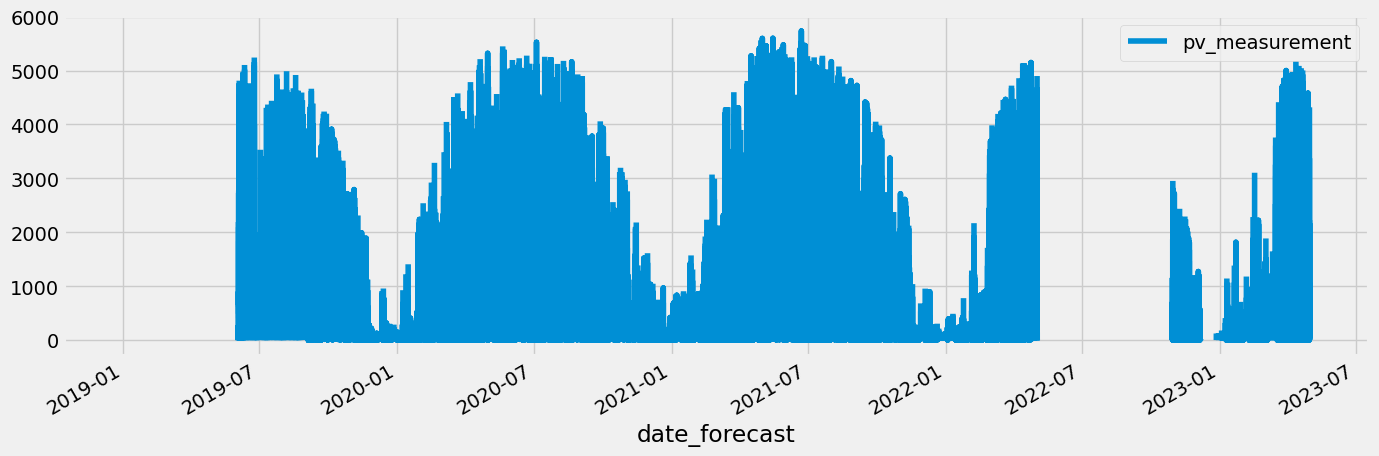

In [6]:
# plot db features column pv_measurement against the index iof the dataframe
df.plot(y='pv_measurement', figsize=(15, 5))

<Axes: xlabel='date_forecast'>

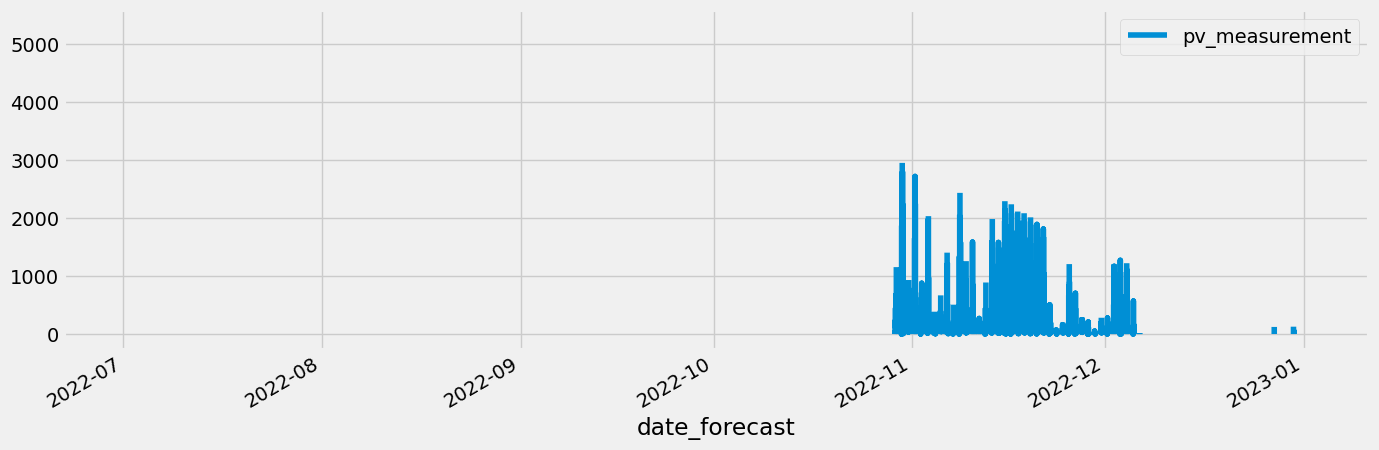

In [7]:
# plot pv_measurement for the period 2022-07-01 to 2023-01-01
df.loc['2022-07-01':'2023-01-01'].plot(y='pv_measurement', figsize=(15, 5))


In [8]:
# check if there are any missing values in the dataframe
df.isna().sum()

absolute_humidity_2m:gm3               0
air_density_2m:kgm3                    0
ceiling_height_agl:m               73146
clear_sky_energy_1h:J                  0
clear_sky_rad:W                        0
cloud_base_agl:m                   30912
dew_or_rime:idx                        0
dew_point_2m:K                         0
diffuse_rad:W                          0
diffuse_rad_1h:J                       0
direct_rad:W                           0
direct_rad_1h:J                        0
effective_cloud_cover:p                0
elevation:m                            0
fresh_snow_12h:cm                      0
fresh_snow_1h:cm                       0
fresh_snow_24h:cm                      0
fresh_snow_3h:cm                       0
fresh_snow_6h:cm                       0
is_day:idx                             0
is_in_shadow:idx                       0
msl_pressure:hPa                       0
precip_5min:mm                         0
precip_type_5min:idx                   0
pressure_100m:hP

In [9]:
# create a new dataframe that contains only the whole hour values of df
df_hourly = df[df.index.minute == 0]
df_hourly.head()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,day_of_week,quarter,month,year,day_of_year,day_of_month,minute,day,building,pv_measurement
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,5.6,1.240,1153.599976,0.0,0.0,1153.599976,1.0,275.200012,0.0,0.0,...,1,1,1,2019,1,1,0,1,2,NaN
2019-01-01 00:00:00,5.6,1.239,1226.400024,0.0,0.0,1226.400024,0.0,275.399994,0.0,0.0,...,1,1,1,2019,1,1,0,1,1,0.0
2019-01-01 01:00:00,5.3,1.241,1090.599976,0.0,0.0,1090.599976,1.0,274.500000,0.0,0.0,...,1,1,1,2019,1,1,0,1,2,NaN
2019-01-01 01:00:00,5.4,1.241,1157.599976,0.0,0.0,1157.599976,0.0,274.700012,0.0,0.0,...,1,1,1,2019,1,1,0,1,1,0.0
2019-01-01 02:00:00,5.5,1.238,1087.599976,0.0,0.0,1087.599976,0.0,275.000000,0.0,0.0,...,1,1,1,2019,1,1,0,1,1,0.0


In [10]:
df_hourly['pv_measurement'].describe()

count    92951.000000
mean       287.232321
std        766.670114
min          0.000000
25%         -0.000000
50%          0.000000
75%        173.362500
max       5733.420000
Name: pv_measurement, dtype: float64

In [11]:
px.histogram(df_hourly, x='pv_measurement', nbins=100, width=800, height=400)

In [12]:
px.box(df_hourly, y='pv_measurement')

## Feature Engineering

Trying to add some new solar-related features

In [13]:
# Function to add solar-related features using pvlib
def add_solar_features_pvlib(df):
    # Fixed latitude and longitude
    latitude = 63.430515
    longitude = 10.395053

    times = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])
    altitudes = df['elevation:m']
    temperatures = df['t_1000hPa:K'] - 273.15
    
    # Calculate solar positions
    solar_position = solarposition.get_solarposition(times, latitude, longitude, altitudes, temperature=temperatures)

    # Add solar position features to the dataframe
    df['sun_zenith:d'] = solar_position['apparent_zenith']
    df['sun_apparent_zenith:d'] = solar_position['zenith']
    df['sun_equation_of_time'] = solar_position['equation_of_time']

    # You can add more features as needed
    return df

In [14]:
df_hourly = add_solar_features_pvlib(df_hourly)

In [15]:
df_hourly.to_csv('df_hourly.csv')

In [18]:
X_test = Data.create_test_data()
X_test = add_solar_features_pvlib(X_test)

In [19]:
X_test.head()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,month,year,day_of_year,day_of_month,minute,day,building,sun_zenith:d,sun_apparent_zenith:d,sun_equation_of_time
date_forecast,,,,,,,,,,,,,,,,,,,,,
2023-05-01 00:00:00,4.4,1.286,912.700012,0.0,0.0,1041.199951,0.0,271.700012,0.0,0.0,...,5,2023,121,1,0,1,0,101.166019,101.166019,2.806174
2023-05-01 00:00:00,4.3,1.283,912.299988,0.0,0.0,1039.900024,0.0,271.700012,0.0,0.0,...,5,2023,121,1,0,1,1,101.166019,101.166019,2.806174
2023-05-01 00:00:00,4.2,1.286,NaN,0.0,0.0,1178.000000,0.0,271.100006,0.0,0.0,...,5,2023,121,1,0,1,2,101.166019,101.166019,2.806174
2023-05-01 00:15:00,4.3,1.287,912.700012,0.0,0.0,1054.800049,0.0,271.700012,0.0,0.0,...,5,2023,121,1,15,1,0,100.792356,100.792356,2.807480
2023-05-01 00:15:00,4.3,1.283,912.299988,0.0,0.0,1053.099976,0.0,271.700012,0.0,0.0,...,5,2023,121,1,15,1,1,100.792356,100.792356,2.807480


In [20]:
X_test_hourly = X_test[X_test.index.minute == 0]

In [21]:
X_test_hourly.head()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,month,year,day_of_year,day_of_month,minute,day,building,sun_zenith:d,sun_apparent_zenith:d,sun_equation_of_time
date_forecast,,,,,,,,,,,,,,,,,,,,,
2023-05-01 00:00:00,4.4,1.286,912.700012,0.0,0.0,1041.199951,0.0,271.700012,0.0,0.0,...,5,2023,121,1,0,1,0,101.166019,101.166019,2.806174
2023-05-01 00:00:00,4.3,1.283,912.299988,0.0,0.0,1039.900024,0.0,271.700012,0.0,0.0,...,5,2023,121,1,0,1,1,101.166019,101.166019,2.806174
2023-05-01 00:00:00,4.2,1.286,NaN,0.0,0.0,1178.000000,0.0,271.100006,0.0,0.0,...,5,2023,121,1,0,1,2,101.166019,101.166019,2.806174
2023-05-01 01:00:00,4.1,1.286,NaN,0.0,0.0,1334.099976,0.0,270.899994,0.0,0.0,...,5,2023,121,1,0,1,2,99.059338,99.059338,2.811393
2023-05-01 01:00:00,4.3,1.287,NaN,0.0,0.0,1095.400024,0.0,271.600006,0.0,0.0,...,5,2023,121,1,0,1,0,99.059338,99.059338,2.811393


In [22]:
FEATURES = list(df_hourly.columns)

FEATURES.remove('pv_measurement')
FEATURES.remove('building') # this is a categorical feature that we will not use

TARGET = 'pv_measurement'

X_train = df_hourly[FEATURES]
y_train = df_hourly[TARGET]

X_test = X_test_hourly[FEATURES]

In [23]:
fwiz = FeatureWiz(corr_limit=0.70, feature_engg='', category_encoders='', dask_xgboost_flag=False, nrows=None, verbose=2)
X_train_selected = fwiz.fit_transform(X_train, y_train)
X_test_selected = fwiz.transform(X_test)
### get list of selected features ###
feats = fwiz.features  

wiz = FeatureWiz(verbose=1)
        X_train_selected = wiz.fit_transform(X_train, y_train)
        X_test_selected = wiz.transform(X_test)
        wiz.features  ### provides a list of selected features ###            
        
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Regression problem ####
    Loaded train data. Shape = (101290, 58)
    Some column names had special characters which were removed...
#### Single_Label R

In [47]:
X_test_selected.to_csv('X_test_hourly.csv')
X_train_selected.to_csv('X_train_hourly.csv')
y_train.to_csv('y_train.csv')